# Mutivariate Regression Analysis
***

## 1  Problem  description 
In  order  to  optimise  airport  operations,  accurate  taxi  time  prediction  has  played  an indispensable  role.  It  is  not  only  important  to  create  more  robust  schedules  and  identify choke  points  between  gate  and  runway  for  practitioners,  but  also  helps  the  government analysts  to  estimate  the  optimal  airport  capacity  and  evaluate  the  regulation  impacts. 

This  study  utilises  taxiing  data  from  three  international  airports  in  Europe  and  Asia: Manchester  Airport  (MAN),  the  third  biggest  airport  in  the  UK;  Zurich  Airport  (ZRH),  the largest  airport  in  Switzerland;  Hong  Kong  International  Airport  (HKG),  ranking  among  the global  top  ten  busiest  airports. 

In  this  study,  we  use  up  to  33  features,  aiming  to  provide  a  sufficient  set  of  features  for  the taxi  time  prediction.  These  relevant  features  are  divided  into  four  categories,  including aircraft  and  airport  operational  factors,  airport  congestion,  aircraft  average  speed  and weather  information. 

Your  main  task  for  this  problem  will  involve  applying  Multiple  linear  regression  (MLR)  for prediction  of  taxi  time  for  one  selected  airport  (The  airport  should  be  the  same  one  as  in Coursework  1).   

This  task  will  need  the  following  steps: 

- (i)  identifying  and  coding  the  required  programming  steps   
- (ii)    preprocessing  the  data  for  the  MLR   
- (iii)  running  the  MLR  and  intepreting  the  results   
- (iv)  preparing  a  group  presentation  with  conclusions  drawn  from  the  analysis.

## Understanding the data

### This dataset is composed by the following feature/variables:

- ***TaxiTime*** (Numerical):

> *"For the purposes of this study, we consider taxi-time to be the actual push-back time to the actual line-up time for departures, and the actual time of leaving the runway to the actual on-block time for arrivals. The average taxiing times at MAN, ZRH, HKG are 9.6, 6.6 and 11.3 minutes respectively. Notice the movements without complete information (i.e. full path between runway and stand) have been removed in advance."*

> *"In order to ensure taxi time prediction accuracy, one should comprehensively consider relevant features that may affect taxi time. In this study, we use up to 33 features, aiming to provide a sufficient set of features for the taxi time prediction. These relevant features are divided into four categories, including aircraft and airport operational factors, airport congestion, aircraft average speed and weather information."*

> (https://www.researchgate.net/publication/347933204_Aircraft_taxi_time_prediction_Feature_importance_and_their_implications)
<br>

##### Features of aircraft and airport operational information.

1. ***depArr*** (Binary) Departure(0) or arrival(1)
2. ***distance*** (Numerical) Sum of taxi distance in metres
3. ***distance_long*** (Numerical) Sum of taxi distance in metres on straights of more than 500 metres
4. ***angle_sum*** (Numerical) Sum of turning angle in degrees
5. ***angle_error*** (Numerical) Count of 180 degree turns (usually 0, or 1 corresponding to a pushback)
6. ***aircraft_weight*** (Categorical Aircraft weight category: small, medium and large
7. ***runway_info*** (Categorical) Aircraft runway information category
8. ***budget_airline*** (Binary) Budget (0) or non-budget (1) airline

##### Features of airport congestion information.

9. ***NDepDep*** (Numerical) Number of other aircraft on the way to runway when current aircraft pushes back
10. ***NDepArr*** (Numerical) Number of other aircraft on the way to stand when current aircraft pushes back
11. ***NArrDep*** (Numerical) Number of other aircraft on the way to runway when current aircraft lands and starts taxiing
12. ***NArrArr*** (Numerical) Number of other aircraft on the way to stand when current aircraft lands and starts taxiing

##### Features of airport historical congestion information.

> *"The information of the features in [this group] can only be obtained when the aircraft has completed its taxiing process. Therefore, these features actually cannot be utilised for practical taxi time prediction. In light of this, we only choose the congestion features listed in [the above group], excluding the historical congestion information [here]."*

13. ***QDepDep*** (Numerical) Number of other aircraft that reach runway and depart while current aircraft is on the way to runway
14. ***QDepArr*** (Numerical) Number of other aircraft that arrive at stand while current aircraft is on the way to runway
15. ***QArrDep*** (Numerical) Number of other aircraft that reach runway and depart while current aircraft is on the way to stand
16. ***QArrArr*** (Numerical) Number of other aircraft that arrive at stand while current aircraft is on the way to stand

##### Features of aircraft average speed information.

17. ***AvgSpdLast5Dep*** (Numerical) Average speed of latest departing 5 aircraft
18. ***AvgSpdLast5Arr*** (Numerical) Average speed of latest 5 arriving aircraft
19. ***AvgSpdLast5*** (Numerical) Average speed of latest 5 aircraft
20. ***AvgSpdLast10Dep*** (Numerical) Average speed of latest departing 10 aircraft
21. ***AvgSpdLast10Arr*** (Numerical) Average speed of latest 10 arriving aircraft
22. ***AvgSpdLast10*** (Numerical) Average speed of latest 10 aircraft

##### Features of weather conditions.

23. ***Pressure*** (Numerical) Air pressure in inHg
24. ***Temperature*** (Numerical) Temperature in Celsius
25. ***WindSpeed*** (Numerical) Wind speed in metres per second
26. ***Visibility*** (Numerical) Visibility in metres
27. ***isRain*** (Binary) Whether it is raining
28. ***isSnow*** (Binary) Whether it is snowing
29. ***isDrizzle*** (Binary) Whether it is drizzling
30. ***isFog*** (Binary) Whether it is fogging
31. ***isMist*** (Binary) Whether it is misting
32. ***isHaze*** (Binary) Whether it is hazing
33. ***isHail*** (Binary) Whether it is hailing



***
## Assumptions of the Model

It's essential to understand the assumptions of the model before we start building and coding. Each assumption if violated means we may have to take extra steps to improve our model or in some cases dump the model altogether. Here is a list of the assumptions of the model:

- Regression residuals must be normally distributed.
- A linear relationship is assumed between the dependent variable and the independent variables.
- The residuals are homoscedastic and approximately rectangular-shaped.
- Absence of multicollinearity is expected in the model, meaning that independent variables are not too highly correlated.
- No Autocorrelation of the residuals.

I will be explaining these assumptions in more detail as we arrive at each of them in the tutorial. At this point, however, we need to have an idea of what they are.

***
## Section One: Import our Libraries
The first thing we need to do is import the libraries we will be using in this tutorial. To visualize our data, we will be using `matplotlib` and `seaborn` to create heatmaps and a scatter matrix. To build our model, we will be using the `sklearn` library, and the evaluation will be taking place with the `statsmodels` library. I've also added a few additional modules to help calculate certain metrics.

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt


import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

%matplotlib inline

## Section Two: Load the Data into Pandas


In [3]:
# load the data 
HK_data = pd.read_csv('hkg_for_taxi_0.csv')



# set the data type and remove object rows and drop NaN's
#HK_data = HK_data.drop(['airline', 'aircraftModel', 'flightNumber'], axis=1)
#HK_data = HK_data.astype(float)
#HK_data - HK_data.dropna()


# check for nulls
display('-'*100)
display(HK_data.isnull().any())

# display the first five rows
display('-'*100)
display(HK_data.head())

'----------------------------------------------------------------------------------------------------'

depArr                  False
distance                False
angle_error             False
distance_long           False
operation_mode          False
angle_sum               False
QDepDep                 False
QDepArr                 False
QArrDep                 False
QArrArr                 False
Ndep                    False
Narr                    False
NDepDep                 False
NDepArr                 False
NArrDep                 False
NArrArr                 False
Pressure                False
VisibilityInMeters      False
TemperatureInCelsius    False
WindSpeedInMPS          False
isRain                  False
isSnow                  False
isDrizzle               False
isFog                   False
isMist                  False
isHaze                  False
isHail                  False
flightNumber             True
airline                  True
aircraftModel           False
budget                  False
aircraft_weight         False
AvgSpdLast5Dep          False
AvgSpdLast

'----------------------------------------------------------------------------------------------------'

,depArr,distance,angle_error,distance_long,operation_mode,angle_sum,QDepDep,QDepArr,QArrDep,QArrArr,...,aircraftModel,budget,aircraft_weight,AvgSpdLast5Dep,AvgSpdLast5Arr,AvgSpdLast5,AvgSpdLast10Dep,AvgSpdLast10Arr,AvgSpdLast10,TaxiTime
0,0,4343.290961,0,3331.204132,0,713.24,22,18,0,0,...,A321,2,2,226.606772,408.978294,288.686410,280.095420,434.522862,314.618139,44.566667
1,0,2188.715861,2,762.050145,3,689.15,13,16,0,0,...,A320,2,2,220.042456,432.550944,377.157592,214.191445,426.992891,326.296700,44.339550
2,0,2928.018673,2,2018.730894,3,713.75,17,22,0,0,...,A320,2,2,122.714650,468.192522,357.686573,153.026442,446.787906,253.363022,44.283333
3,0,1374.346073,0,0.000000,3,448.66,19,12,0,0,...,B744,2,3,219.013932,486.168455,284.833901,225.696158,453.783983,313.106806,43.895083
4,0,5783.327909,2,4204.423896,0,966.73,11,32,0,0,...,A333,2,3,261.753489,426.206956,326.829131,236.975477,454.454804,343.980223,43.750000


## Section Three: Check for Perfect Multicollinearity

One of the first things we can do after loading our data is to validate one of the assumptions of our model; in this case, we will be checking for multicollinearity.

### What is multicollinearity?
One of the assumptions of our model is that there isn't any Perfect multicollinearity. Multicollinearity is where one of the explanatory variables is highly correlated with another explanatory variable. **In essence, one of the X variables is almost perfectly correlated with another or multiple X variables.**

### What is the problem with multicollinearity?
The problem with multicollinearity, from a math perspective, is that the coefficient estimates themselves tend to be unreliable. Additionally, the standard errors of slope coefficients become artificially inflated. **Because the standard error is used to help calculate the p-value, this leads to a higher probability that we will incorrectly conclude that a variable is not statistically significant.**

Another way we can look at this problem is by using an analogy. Imagine we ask you to go to a concert and determine who was the best singer. This task would become very challenging if you couldn't distinguish the two singers because they are singing at the same volume. **The idea is the same in our analysis, how can we determine which variable is playing a role in our model if we can't distinguish the two? The problem is we can't.**

Now a little correlation is fine, but if it gets too high, we can effectively distinguish the two variables. The other issue that arises is that when we have highly correlated exploratory variables is that, in a sense, we have duplicates. This means that we can remove one of them and we haven't lost anything; the model would still perform the same.

### How to test for multicollinearity?
Because of these drawbacks, we should always check for multicollinearity in our data. Now, in the step above I purposely pull in variables that I knew would be highly correlated with each other; that way we could see some examples of variables that would cause some issues.

The first thing we can do is create a correlation matrix using the `corr()`  function; this will create a matrix with each variable having its correlation calculated for all the other variables. Keep in mind, if you travel diagonally down the matrix all the associations should be one, as it is calculating the correlation of the variable with itself. When we have multiple variables as we do, I sometimes prefer to use a correlation heatmap this way I can quickly identify the highly correlated variables, by just looking for the darker colors.

,depArr,distance,angle_error,distance_long,operation_mode,angle_sum,QDepDep,QDepArr,QArrDep,QArrArr,...,isHail,budget,aircraft_weight,AvgSpdLast5Dep,AvgSpdLast5Arr,AvgSpdLast5,AvgSpdLast10Dep,AvgSpdLast10Arr,AvgSpdLast10,TaxiTime
depArr,1.000000,-0.701410,-0.611059,-0.704587,0.366738,-0.268462,-0.798873,-0.736613,0.660057,0.597975,...,NaN,NaN,0.016774,-0.010731,-0.008991,0.022917,-0.008767,-0.011356,0.031124,-0.796259
distance,-0.701410,1.000000,0.506096,0.968428,-0.496636,0.512674,0.634621,0.583160,-0.284904,-0.265596,...,NaN,NaN,0.031674,0.096185,0.006606,0.022155,0.099798,0.008047,0.027614,0.757475
angle_error,-0.611059,0.506096,1.000000,0.521515,-0.252471,0.175671,0.534709,0.489720,-0.408267,-0.367339,...,NaN,NaN,0.108622,0.017503,0.006323,-0.008964,0.016899,0.001137,-0.017291,0.566319
distance_long,-0.704587,0.968428,0.521515,1.000000,-0.513544,0.380562,0.642316,0.589469,-0.320697,-0.294188,...,NaN,NaN,0.023751,0.097056,0.008562,0.022284,0.101551,0.011443,0.027347,0.741590
operation_mode,0.366738,-0.496636,-0.252471,-0.513544,1.000000,-0.030770,-0.322423,-0.288872,0.285097,0.265223,...,NaN,NaN,-0.025691,-0.271299,0.017988,-0.122978,-0.293088,0.021066,-0.156820,-0.336413
angle_sum,-0.268462,0.512674,0.175671,0.380562,-0.030770,1.000000,0.260229,0.243683,-0.031711,-0.039099,...,NaN,NaN,-0.042973,-0.012108,-0.002240,-0.015025,-0.016021,-0.002303,-0.015625,0.357730
QDepDep,-0.798873,0.634621,0.534709,0.642316,-0.322423,0.260229,1.000000,0.840430,-0.527302,-0.477706,...,NaN,NaN,-0.027948,-0.174871,0.021624,-0.153325,-0.180356,0.028649,-0.195973,0.903160
QDepArr,-0.736613,0.583160,0.489720,0.589469,-0.288872,0.243683,0.840430,1.000000,-0.486206,-0.440476,...,NaN,NaN,-0.038549,-0.140261,-0.007424,-0.051210,-0.141575,0.008150,-0.083063,0.829351
QArrDep,0.660057,-0.284904,-0.408267,-0.320697,0.285097,-0.031711,-0.527302,-0.486206,1.000000,0.668766,...,NaN,NaN,0.068277,-0.088428,0.016318,-0.071147,-0.104044,0.020815,-0.093030,-0.412515
QArrArr,0.597975,-0.265596,-0.367339,-0.294188,0.265223,-0.039099,-0.477706,-0.440476,0.668766,1.000000,...,NaN,NaN,0.065152,-0.059443,0.003445,0.065651,-0.063862,0.013373,0.043261,-0.378322


<AxesSubplot:>

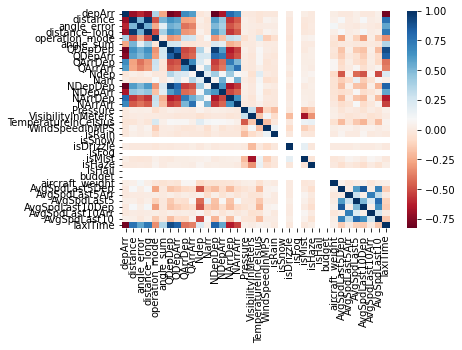

In [4]:
# calculate the correlation matrix
corr = HK_data.corr()

# display the correlation matrix
display(corr)

# plot the correlation heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')

***
Looking at the heatmap above we can see some highly correlated variables. However, we should be more systematic in our approach to removing highly correlated variables. One method we can use is the `variance_inflation_factor` which **is a measure of how much a particular variable is contributing to the standard error in the regression model. When significant multicollinearity exists, the variance inflation factor will be huge for the variables in the calculation.**

A general recommendation is that if any of our variables come back with a **value of 5 or higher, then they should be removed from the model.** We've decided to show you how the VIF comes out before we drop the highly correlated variables and after we remove the highly correlated variables. Going forward we will only be using the `HK_data_after` data frame.

In [5]:
# define two data frames one before the drop and one after the drop
HK_data_before = HK_data
HK_data_after = HK_data.drop(['AvgSpdLast10', 'distance', 'depArr', 'isSnow','isFog', 'isHail', 'budget', 'QDepDep', 'QDepArr',  'NDepDep','NDepArr', 'NArrDep', 'NArrArr', 'AvgSpdLast5Dep'], axis = 1)

# the VFI does expect a constant term in the data, so we need to add one using the add_constant method
X1 = sm.tools.add_constant(HK_data_before)
X2 = sm.tools.add_constant(HK_data_after)

# create the series for both
series_before = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index=X1.columns)
series_after = pd.Series([variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])], index=X2.columns)

# display the series
print('DATA BEFORE')
print('-'*100)
display(series_before)

print('DATA AFTER')
print('-'*100)
display(series_after)

C:\Users\joini\anaconda3\envs\stem39\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\joini\anaconda3\envs\stem39\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


DATA BEFORE
----------------------------------------------------------------------------------------------------


depArr                  8.477973e+00
distance                3.203318e+01
angle_error             1.750124e+00
distance_long           2.419322e+01
operation_mode          1.853496e+00
angle_sum               2.119830e+00
QDepDep                 2.082122e+01
QDepArr                 5.906246e+00
QArrDep                 3.719168e+00
QArrArr                 3.896993e+00
Ndep                             inf
Narr                             inf
NDepDep                          inf
NDepArr                          inf
NArrDep                          inf
NArrArr                          inf
Pressure                1.614312e+00
VisibilityInMeters      2.518220e+00
TemperatureInCelsius    1.663586e+00
WindSpeedInMPS          1.171351e+00
isRain                  1.090223e+00
isSnow                           NaN
isDrizzle               1.061341e+00
isFog                            NaN
isMist                  2.153381e+00
isHaze                  1.324086e+00
isHail                           NaN
b

DATA AFTER
----------------------------------------------------------------------------------------------------


const                   93885.137686
angle_error                 1.665538
distance_long               3.122595
operation_mode              1.751492
angle_sum                   1.282587
QArrDep                     2.444936
QArrArr                     2.376690
Ndep                        1.965288
Narr                        1.508747
Pressure                    1.611310
VisibilityInMeters          2.516284
TemperatureInCelsius        1.645275
WindSpeedInMPS              1.164303
isRain                      1.087176
isDrizzle                   1.060593
isMist                      2.152872
isHaze                      1.323574
aircraft_weight             1.066932
AvgSpdLast5Arr              2.277973
AvgSpdLast5                 1.869192
AvgSpdLast10Dep             1.817220
AvgSpdLast10Arr             2.104040
TaxiTime                    3.295039
dtype: float64

Looking at the data above we now get some confirmation about our suspicion. It makes sense to remove either `distance` or `distance_long` and some of the historical data and AvgSpd metrics. Once we remove those metrics and recalculate the VFI, we get a passing grade and can move forward.

*** 
I also want to demonstrate another way to visualize our data to check for multicollinearity. Inside of `seaborn` there is a `pairplot` chart and inside `pandas`, there is a `scatter_matrix` chart that will create a scatter plot for each variable in our dataset against another variable. These are great tools for visualising the correlation of one variable across all the other variables in the dataset. What you're looking for is a more random distribution, there shouldn't be any strong trends in the scatter matrix as this would be identifying correlated variables. Now, for our explanatory variable, we want to see trends!

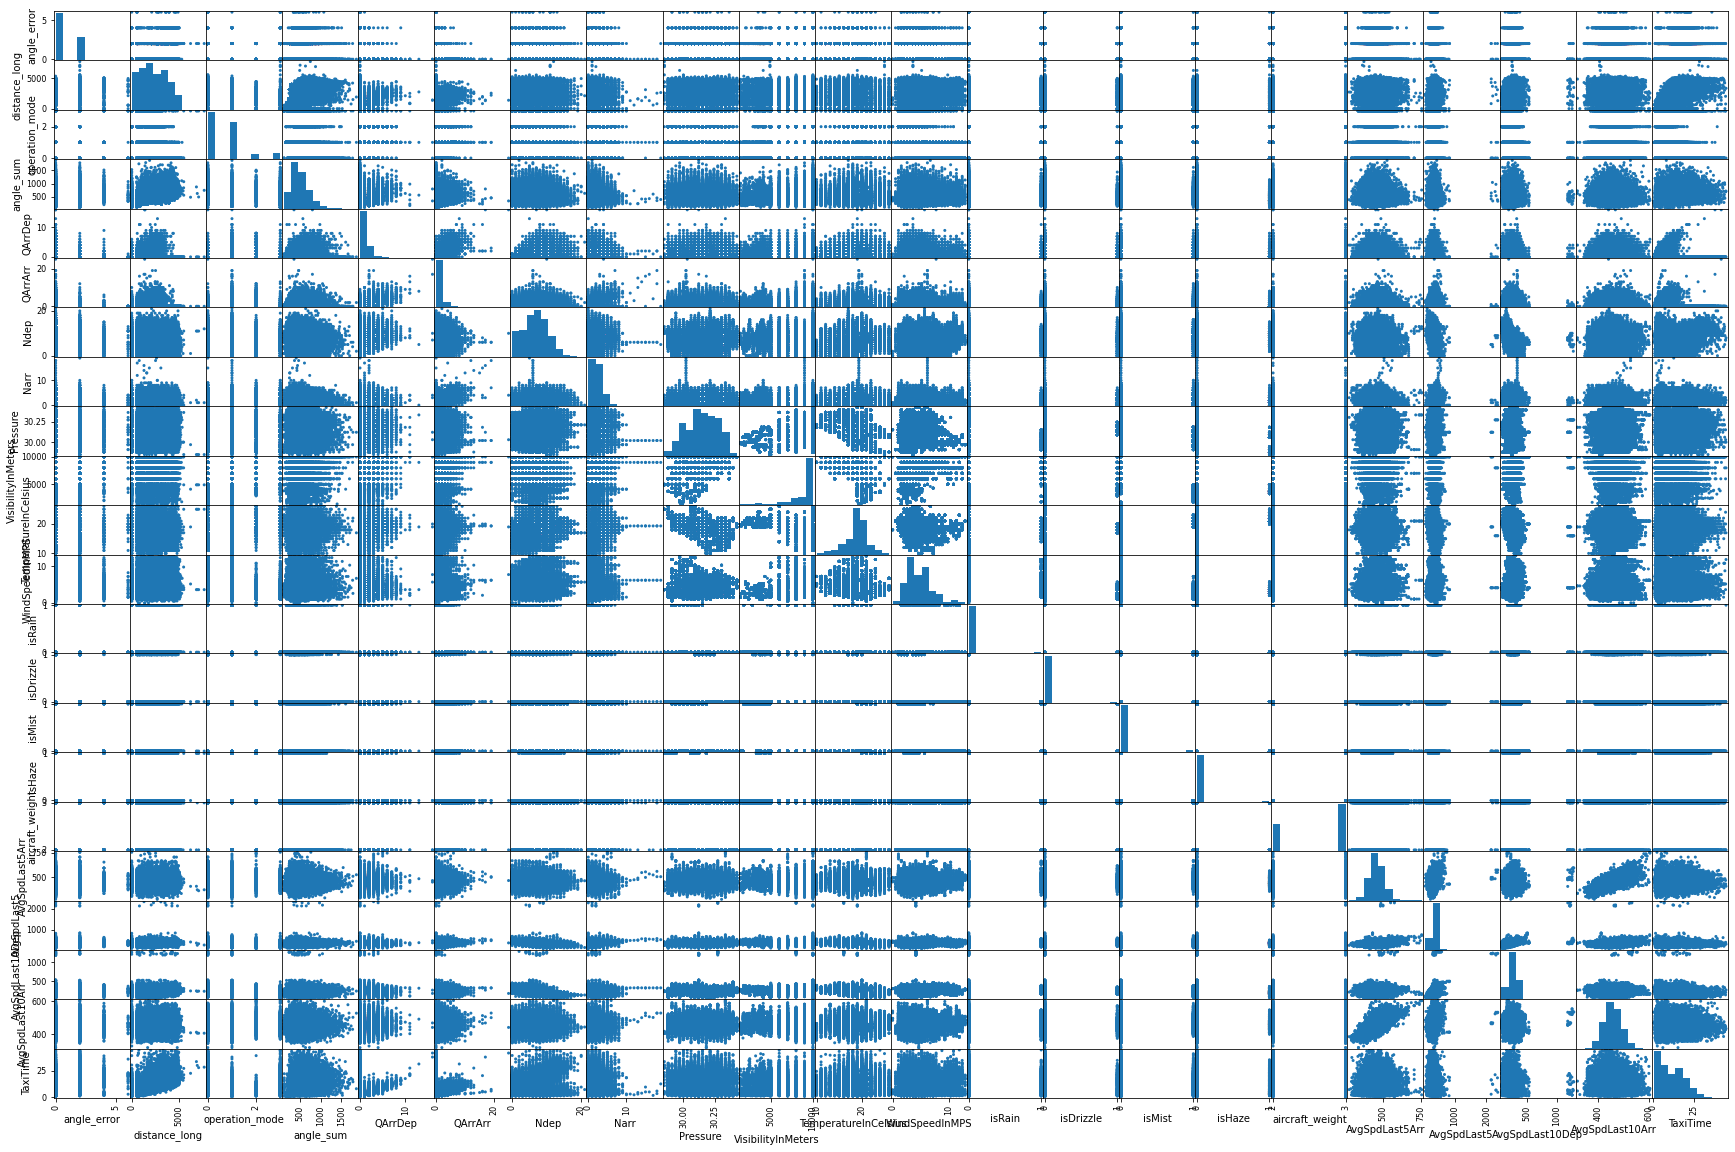

In [6]:
# define the plot
pd.plotting.scatter_matrix(HK_data_after, alpha = 1, figsize = (30, 20))

# show the plot
plt.show()

## Remove Noise
Columns with high or zero variance (for categorical variables) should be removed from the dataset. The reason is that they add more noise to the set than the information that they carry.

In [7]:
#lets also drop those sparse data points (creating a cross in the scatter matrix)

# define two data frames one before the drop and one after the drop
HK_data_before = HK_data
HK_data_after = HK_data.drop(['QArrArr', 'QArrDep', 'isRain','isDrizzle', 'isMist', 'isHaze', 'aircraft_weight', 'AvgSpdLast10', 'distance', 'depArr', 'isSnow','isFog', 'isHail', 'budget', 'AvgSpdLast5Dep'], axis = 1)

# the VFI does expect a constant term in the data, so we need to add one using the add_constant method
X1 = sm.tools.add_constant(HK_data_before)
X2 = sm.tools.add_constant(HK_data_after)

# create the series for both
series_before = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index=X1.columns)
series_after = pd.Series([variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])], index=X2.columns)

# display the series
print('DATA BEFORE')
print('-'*100)
display(series_before)

print('DATA AFTER')
print('-'*100)
display(series_after)

C:\Users\joini\anaconda3\envs\stem39\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\joini\anaconda3\envs\stem39\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


DATA BEFORE
----------------------------------------------------------------------------------------------------


depArr                  8.477973e+00
distance                3.203318e+01
angle_error             1.750124e+00
distance_long           2.419322e+01
operation_mode          1.853496e+00
angle_sum               2.119830e+00
QDepDep                 2.082122e+01
QDepArr                 5.906246e+00
QArrDep                 3.719168e+00
QArrArr                 3.896993e+00
Ndep                             inf
Narr                             inf
NDepDep                          inf
NDepArr                          inf
NArrDep                          inf
NArrArr                          inf
Pressure                1.614312e+00
VisibilityInMeters      2.518220e+00
TemperatureInCelsius    1.663586e+00
WindSpeedInMPS          1.171351e+00
isRain                  1.090223e+00
isSnow                           NaN
isDrizzle               1.061341e+00
isFog                            NaN
isMist                  2.153381e+00
isHaze                  1.324086e+00
isHail                           NaN
b

DATA AFTER
----------------------------------------------------------------------------------------------------


const                   9.033927e+04
angle_error             1.601209e+00
distance_long           3.136870e+00
operation_mode          1.711160e+00
angle_sum               1.265268e+00
QDepDep                 1.802854e+01
QDepArr                 5.619073e+00
Ndep                             inf
Narr                             inf
NDepDep                          inf
NDepArr                          inf
NArrDep                          inf
NArrArr                          inf
Pressure                1.553864e+00
VisibilityInMeters      1.137392e+00
TemperatureInCelsius    1.621783e+00
WindSpeedInMPS          1.149063e+00
AvgSpdLast5Arr          2.278213e+00
AvgSpdLast5             1.883468e+00
AvgSpdLast10Dep         1.815331e+00
AvgSpdLast10Arr         2.105076e+00
TaxiTime                9.274213e+00
dtype: float64

In [8]:
#lets also drop those sparse data points (creating a cross in the scatter matrix)

# define two data frames one before the drop and one after the drop
HK_data_before = HK_data
HK_data_after = HK_data.drop(['Pressure', 'VisibilityInMeters', 'TemperatureInCelsius', 'WindSpeedInMPS', 'AvgSpdLast10Arr', 'QDepDep', 'angle_error', 'operation_mode', 'Ndep', 'Narr', 'NDepDep', 'NDepArr', 'NArrDep', 'NArrArr', 'QArrArr', 'QArrDep', 'isRain','isDrizzle', 'isMist', 'isHaze', 'aircraft_weight', 'AvgSpdLast10', 'distance', 'depArr', 'isSnow','isFog', 'isHail', 'budget', 'AvgSpdLast5Dep'], axis = 1)

# the VFI does expect a constant term in the data, so we need to add one using the add_constant method
X1 = sm.tools.add_constant(HK_data_before)
X2 = sm.tools.add_constant(HK_data_after)

# create the series for both
series_before = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index=X1.columns)
series_after = pd.Series([variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])], index=X2.columns)

# display the series
print('DATA BEFORE')
print('-'*100)
display(series_before)

print('DATA AFTER')
print('-'*100)
display(series_after)

C:\Users\joini\anaconda3\envs\stem39\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\joini\anaconda3\envs\stem39\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


DATA BEFORE
----------------------------------------------------------------------------------------------------


depArr                  8.477973e+00
distance                3.203318e+01
angle_error             1.750124e+00
distance_long           2.419322e+01
operation_mode          1.853496e+00
angle_sum               2.119830e+00
QDepDep                 2.082122e+01
QDepArr                 5.906246e+00
QArrDep                 3.719168e+00
QArrArr                 3.896993e+00
Ndep                             inf
Narr                             inf
NDepDep                          inf
NDepArr                          inf
NArrDep                          inf
NArrArr                          inf
Pressure                1.614312e+00
VisibilityInMeters      2.518220e+00
TemperatureInCelsius    1.663586e+00
WindSpeedInMPS          1.171351e+00
isRain                  1.090223e+00
isSnow                           NaN
isDrizzle               1.061341e+00
isFog                            NaN
isMist                  2.153381e+00
isHaze                  1.324086e+00
isHail                           NaN
b

DATA AFTER
----------------------------------------------------------------------------------------------------


const              108.495130
distance_long        2.553301
angle_sum            1.198429
QDepArr              3.324962
AvgSpdLast5Arr       1.115024
AvgSpdLast5          1.514591
AvgSpdLast10Dep      1.476262
TaxiTime             5.124485
dtype: float64

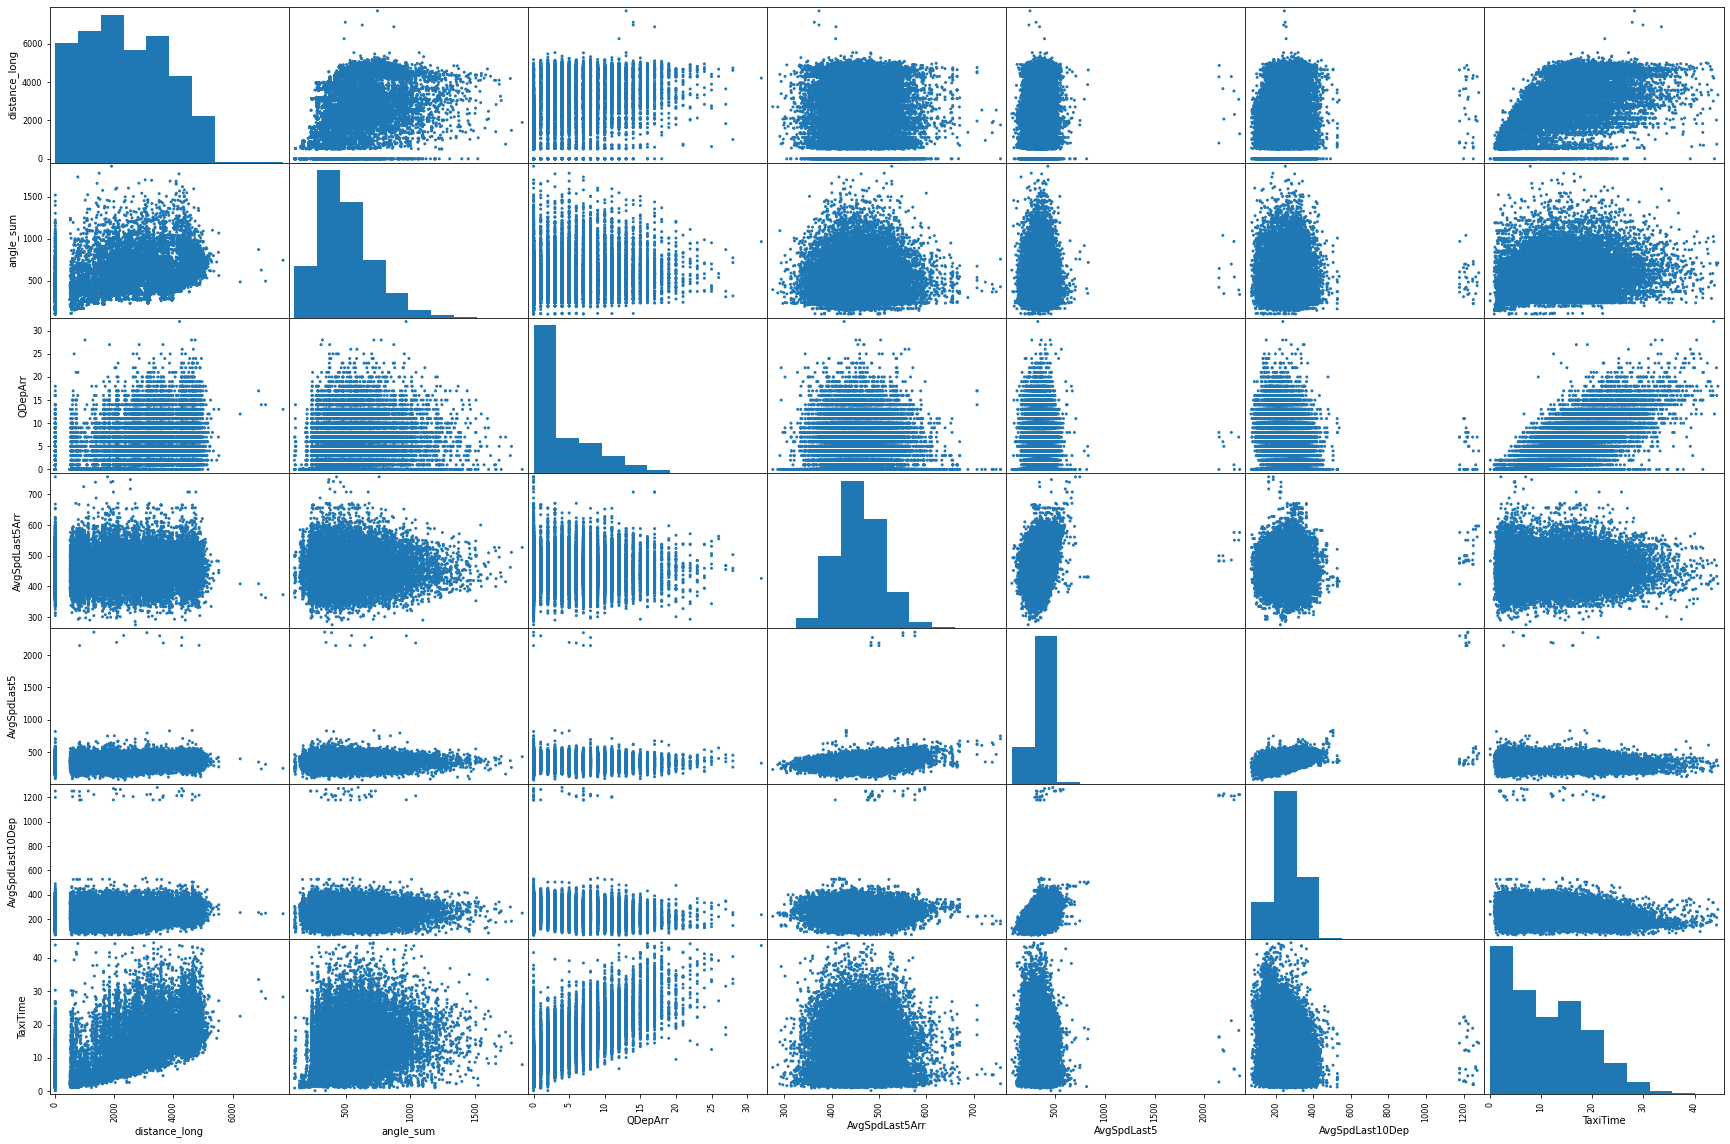

In [9]:
# and lets look at that again

# define the plot
pd.plotting.scatter_matrix(HK_data_after, alpha = 1, figsize = (30, 20))

# show the plot
plt.show()

***
## Section Four: Describe the Data Set
Before we get to an in-depth exploration of the data or even building the model, we should explore the data a little more and see how the data is distributed and if there are any outliers. I will be adding a few more metrics to the `summary data frame`, sp that it now includes a metric for three standard deviations below and above the mean.

I'll store my information in a new variable called `desc_df`.

In [10]:
# get the summary
desc_df = HK_data.describe()

# add the standard deviation metric
desc_df.loc['+3_std'] = desc_df.loc['mean'] + (desc_df.loc['std'] * 3)
desc_df.loc['-3_std'] = desc_df.loc['mean'] - (desc_df.loc['std'] * 3)

# display it
desc_df

,depArr,distance,angle_error,distance_long,operation_mode,angle_sum,QDepDep,QDepArr,QArrDep,QArrArr,...,isHail,budget,aircraft_weight,AvgSpdLast5Dep,AvgSpdLast5Arr,AvgSpdLast5,AvgSpdLast10Dep,AvgSpdLast10Arr,AvgSpdLast10,TaxiTime
count,33095.000000,33095.000000,33095.000000,33095.000000,33095.000000,33095.000000,33095.000000,33095.000000,33095.000000,33095.000000,...,33095.0,33095.0,33095.000000,33095.000000,33095.000000,33095.000000,33095.000000,33095.000000,33095.000000,33095.000000
mean,0.475963,3148.168838,0.709171,2310.261448,0.695241,502.283695,3.667563,3.504850,0.880556,0.883306,...,0.0,2.0,2.635957,261.442898,457.944271,355.147229,261.654720,457.858438,355.148591,11.309059
std,0.499429,1454.458373,1.011802,1407.975246,0.847575,212.537245,4.375341,4.534635,1.399834,1.549990,...,0.0,0.0,0.481168,81.877076,48.653270,79.748158,73.981542,35.109735,62.891565,7.750401
min,0.000000,460.720844,0.000000,0.000000,0.000000,105.980000,0.000000,0.000000,0.000000,0.000000,...,0.0,2.0,2.000000,61.947564,275.100926,65.896857,67.368914,318.907602,126.870476,0.105617
25%,0.000000,1731.094932,0.000000,1114.729309,0.000000,350.740000,0.000000,0.000000,0.000000,0.000000,...,0.0,2.0,2.000000,208.959800,424.665357,308.007014,212.573287,434.013176,316.213383,4.181075
50%,0.000000,3141.958545,0.000000,2166.025849,1.000000,463.200000,1.000000,1.000000,0.000000,0.000000,...,0.0,2.0,3.000000,261.403052,455.844150,356.652519,263.482045,456.758003,356.852229,10.116667
75%,1.000000,4370.075375,2.000000,3443.544467,1.000000,618.970000,7.000000,6.000000,2.000000,1.000000,...,0.0,2.0,3.000000,312.084464,488.116531,402.906877,310.754943,480.594637,395.001562,16.883333
max,1.000000,8703.918643,6.000000,7708.307669,3.000000,1862.390000,23.000000,32.000000,16.000000,25.000000,...,0.0,2.0,3.000000,2228.126495,756.859315,2355.228901,1281.081659,603.705634,1419.797417,44.566667
+3_std,1.974251,7511.543958,3.744577,6534.187185,3.237967,1139.895430,16.793585,17.108753,5.080057,5.533276,...,0.0,2.0,4.079461,507.074125,603.904081,594.391702,483.599345,563.187642,543.823287,34.560263
-3_std,-1.022325,-1215.206282,-2.326236,-1913.664288,-1.847485,-135.328040,-9.458459,-10.099054,-3.318945,-3.766665,...,0.0,2.0,1.192453,15.811672,311.984461,115.902755,39.710095,352.529234,166.473895,-11.942144


In [11]:
"""
# filter the data frame to remove the values exceeding 3 standard deviations
econ_remove_df = econ_df[(np.abs(stats.zscore(econ_df)) < 3).all(axis=1)]

# what rows were removed
econ_df.index.difference(econ_remove_df.index)
"""

'\n# filter the data frame to remove the values exceeding 3 standard deviations\necon_remove_df = econ_df[(np.abs(stats.zscore(econ_df)) < 3).all(axis=1)]\n\n# what rows were removed\necon_df.index.difference(econ_remove_df.index)\n'

***
## Section Five: Build the Model
Okay, now that we've loaded, cleaned, and explored the data we can proceed to the next part, building the model. The first thing we need to do is, define our exploratory variables and our explanatory variable. 

#### Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive; a healthy ratio is 20% testing and 80% training but a 30% 70% split is also ok.

After which, you train with the training set and test with the testing set. This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that we know the outcome of each data point in this dataset, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it’s truly an out-of-sample testing.

After splitting the data, we will create an instance of the linear regression model and pass through the `X_train` and `y_train` variables using the `fit()` function.

In [36]:
# define our input variable (X) & output variable
#HK_data_after = HK_data.drop([''], axis = 1)

X = HK_data_after.drop('TaxiTime', axis = 1)
Y = HK_data_after[['TaxiTime']]

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

# create a Linear Regression model object
regression_model = LinearRegression()

# pass through the X_train & y_train data set
regression_model.fit(X_train, y_train)

# The coefficients
print ('Coefficients: ', regression_model.coef_)

Coefficients:  [[ 0.00211787  0.00250269  0.97991888  0.00467553 -0.00824335 -0.0061114 ]]


***
### Exploring the Output
With the data now fitted to the model, we can explore the output. The first thing we should do is look at the intercept of the model, and then we will print out each of the coefficients of the model. I print everything out using a loop to make it more efficient.

In [37]:
# let's grab the coefficient of our model and the intercept
intercept = regression_model.intercept_[0]
coefficent = regression_model.coef_[0][0]

print("The intercept for our model is {:.4}".format(intercept))
print('-'*100)

# loop through the dictionary and print the data
for coef in zip(X.columns, regression_model.coef_[0]):
    print("The Coefficient for {} is {:.2}".format(coef[0],coef[1]))

The intercept for our model is 4.096
----------------------------------------------------------------------------------------------------
The Coefficient for distance_long is 0.0021
The Coefficient for angle_sum is 0.0025
The Coefficient for QDepArr is 0.98
The Coefficient for AvgSpdLast5Arr is 0.0047
The Coefficient for AvgSpdLast5 is -0.0082
The Coefficient for AvgSpdLast10Dep is -0.0061


__Coefficient__ and __Intercept__ , are the parameters of the fit line. 
Given that it is a multiple linear regression, with 21 parameters, and knowing that the parameters are the intercept and coefficients of hyperplane, sklearn can estimate them from our data. Scikit-learn uses plain Ordinary Least Squares method to solve this problem.

**The intercept term is the value of the dependent variable when all the independent variables are equal to zero. For each slope coefficient, it is the estimated change in the dependent variable for a one unit change in that particular independent variable, holding the other independent variables constant.**

For example, if all the independent variables were equal to zero, then the `TaxiTime` would be -11.31%. If we looked at the `angle_error` while *holding all the other independent variables constant*, then we would say for a 1 unit increase in `angle_error` would lead to a 1.3% increase in Taxi Time.

In [38]:
# Get multiple predictions
y_pred = regression_model.predict(X_test)

# Show the first 5 predictions
y_pred[:5]

array([[15.48020243],
       [11.34829564],
       [17.98430495],
       [21.19711622],
       [17.20586295]])

# Plot the model

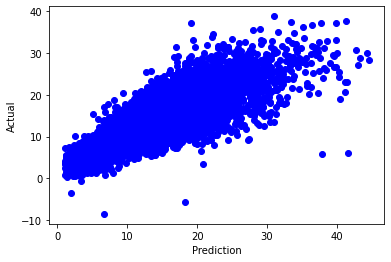

In [39]:
plt.scatter(y_test, y_pred,  color='blue')
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

InvalidIndexError: (slice(None, None, None), None)

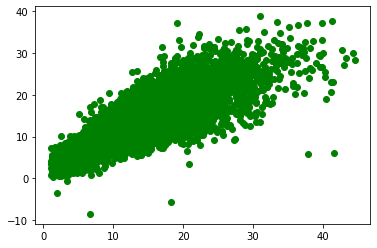

In [42]:
model2 = LinearRegression()
model2.fit(y_test, y_pred)

plt.scatter(y_test, y_pred,color='g')
plt.plot(y_test, model2.predict(y_test),color='k')

plt.show()

InvalidIndexError: (slice(None, None, None), None)

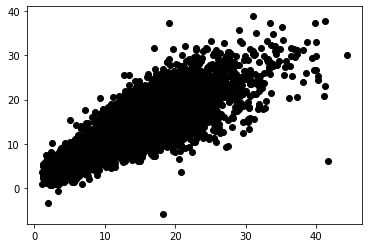

In [32]:
import matplotlib.pyplot as plt

# Plot outputs
plt.scatter(y_test, y_pred, color="black")
plt.plot(y_test, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

InvalidIndexError: (slice(None, None, None), None)

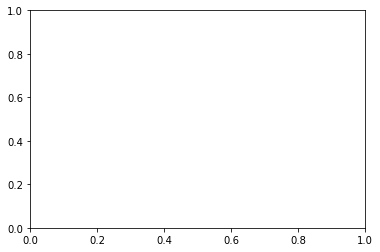

In [35]:
import matplotlib as plt
import matplotlib.pyplot as plt
plt.plot(y_test,y_pred)

***
## Section Six: Evaluating the Model

### Using the `Statsmodel`
To make diagnosing the model easier, we will, from this point forward, be using the `statsmodel` module. This module has built-in functions that will make calculating metrics quick. However, we will need "rebuild" our model using the `statsmodel` module. We do this by creating a constant variable, call the `OLS()` method and then the `fit()` method. We now have a new model, and the first thing we need to do is to make sure that the assumptions of our model hold. This means checking the following:

- Regression residuals must be normally distributed.
- The residuals are homoscedastic
- Absence of multicollinearity (we did this above).
- No Autocorrelation.

In [47]:
# define our intput
X2 = sm.add_constant(X)

# create a OLS model
model = sm.OLS(Y, X2)

# fit the data
est = model.fit()

## Checking for Heteroscedasticity
### What is Heteroscedasticity?
One of the assumptions of our model is that there is no heteroscedasticity. What exactly does this mean? Well, to give a simple definition it merely means the standard errors of a variable, monitored over a specific amount of time, are non-constant. Let's imagine a situation where heteroscedasticity could exist.

Imagine we modeled household consumption based on income, something we would probably notice is how the variability of expenditures changes depending on how much income you have. In simple terms, we would see that households with more income spend money on a broader set of items compared to lower income households that would only be able to focus on the main staples. This results in standard errors that change over income levels.

***

### What is the problem with heteroscedasticity?
There are two big reasons why you want homoscedasticity:

1. While heteroscedasticity does not cause bias in the coefficient estimates, **it causes the coefficient estimates to be less precise.** The Lower precision increases the likelihood that the coefficient estimates are further from the correct population value.

2. **Heteroscedasticity tends to produce p-values that are smaller than they should be.** This effect occurs because heteroscedasticity increases the variance of the coefficient estimates, but the OLS procedure does not detect this increase. Consequently, OLS calculates the t-values and F-values using an underestimated amount of variance. This problem can lead you to conclude that a model term is statistically significant when it is not significant.

***

### How to test for heteroscedasticity?
To check for heteroscedasticity, we can leverage the `statsmodels.stats.diagnostic` module. This module will give us to a few test functions we can run, the Breusch-Pagan and the White test for heteroscedasticity. The **Breusch-Pagan is a more general test for heteroscedasticity while the White test is a unique case.**

- The null hypothesis for both the White’s test and the Breusch-Pagan test is that the variances for the errors are equal:
    - **H0 = σ2i = σ2**
- The alternate hypothesis (the one you’re testing), is that the variances are not equal:
    - **H1 = σ2i ≠ σ2**

Our goal is to fail to reject the null hypothesis, have a high p-value because that means we have no heteroscedasticity.

In [99]:
"""
# Run the White's test
_, pval, __, f_pval = diag.het_white(est.resid, est.model.exog, retres = False)
print(pval, f_pval)
print('-'*100)

# print the results of the test
if pval > 0.05:
    print("For the White's Test")
    print("The p-value was {:.4}".format(pval))
    print("We fail to reject the null hypthoesis, so there is no heterosecdasticity. \n")
    
else:
    print("For the White's Test")
    print("The p-value was {:.4}".format(pval))
    print("We reject the null hypthoesis, so there is heterosecdasticity. \n")
"""

'\n# Run the White\'s test\n_, pval, __, f_pval = diag.het_white(est.resid, est.model.exog, retres = False)\nprint(pval, f_pval)\nprint(\'-\'*100)\n\n# print the results of the test\nif pval > 0.05:\n    print("For the White\'s Test")\n    print("The p-value was {:.4}".format(pval))\n    print("We fail to reject the null hypthoesis, so there is no heterosecdasticity. \n")\n    \nelse:\n    print("For the White\'s Test")\n    print("The p-value was {:.4}".format(pval))\n    print("We reject the null hypthoesis, so there is heterosecdasticity. \n")\n'

In [48]:
# Run the Breusch-Pagan test
_, pval, __, f_pval = diag.het_breuschpagan(est.resid, est.model.exog)
print(pval, f_pval)
print('-'*100)

# print the results of the test
if pval > 0.05:
    print("For the Breusch-Pagan's Test")
    print("The p-value was {:.4}".format(pval))
    print("We fail to reject the null hypthoesis, so there is no heterosecdasticity.")

else:
    print("For the Breusch-Pagan's Test")
    print("The p-value was {:.4}".format(pval))
    print("We reject the null hypthoesis, so there is heterosecdasticity.")



0.0 0.0
----------------------------------------------------------------------------------------------------
For the Breusch-Pagan's Test
The p-value was 0.0
We reject the null hypthoesis, so there is heterosecdasticity.


## Checking for Autocorrelation
### What is autocorrelation?
Autocorrelation is a characteristic of data in which the correlation between the values of the same variables is based on related objects. It violates the assumption of instance independence, which underlies most of conventional models.  

When you have a series of numbers, and there is a pattern such that values in the series can be predicted based on preceding values in the series, the set of numbers is said to exhibit autocorrelation. This is also known as serial correlation and serial dependence. It generally exists in those types of data-sets in which the data, instead of being randomly selected, are from the same source.

***
### What is the problem with autocorrelation?
The existence of autocorrelation means that computed standard errors, and consequently p-values, are misleading. Autocorrelation in the residuals of a model is also a sign that the model may be unsound. A workaround is we can compute more robust standard errors.

***
### How to test for autocorrelation?
Again, we will go to our favorite module the `statsmodels.stats.diagnostic` module, and use the Ljung-Box test for no autocorrelation of residuals. Here:

- **H0: The data are random.**
- **Ha: The data are not random.**

That means we want to fail to reject the null hypothesis, have a large p-value because then it means we have no autocorrelation. To use the Ljung-Box test, we will call the `acorr_ljungbox` function, pass through the `est.resid` and then define the lags. 

The lags can either be calculated by the function itself, or we can calculate them. If the function handles it the max lag will be `min((num_obs // 2 - 2), 40)`, however, there is a rule of thumb that for non-seasonal time series the lag is ` min(10, (num_obs // 5))`.

We also can visually check for autocorrelation by using the `statsmodels.graphics` module to plot a graph of the autocorrelation factor.

In [49]:
# test for autocorrelation
from statsmodels.stats.stattools import durbin_watson

# calculate the lag, optional
lag = min(10, (len(X)//5))
print('The number of lags will be {}'.format(lag))
print('-'*100)

# run the Ljung-Box test for no autocorrelation of residuals
# test_results = diag.acorr_breusch_godfrey(est, nlags = lag, store = True)
test_results = diag.acorr_ljungbox(est.resid, lags = lag)

# grab the p-values and the test statistics
ibvalue, p_val = test_results

test_results

The number of lags will be 10
----------------------------------------------------------------------------------------------------


,lb_stat,lb_pvalue
1,1965.451367,0.0
2,3770.363247,0.0
3,5667.224854,0.0
4,7614.247721,0.0
5,9330.628630,0.0
6,11189.252199,0.0
7,13086.148350,0.0
8,14908.472309,0.0
9,16796.885764,0.0
10,18641.494143,0.0


In [102]:
"""
# print the results of the test
if min(p_val) > 0.05:
    print("The lowest p-value found was {:.4}".format(min(p_val)))
    print("We fail to reject the null hypthoesis, so there is no autocorrelation.")
    print('-'*100)
else:
    print("The lowest p-value found was {:.4}".format(min(p_val)))
    print("We reject the null hypthoesis, so there is autocorrelation.")
    print('-'*100)
"""

'\n# print the results of the test\nif min(p_val) > 0.05:\n    print("The lowest p-value found was {:.4}".format(min(p_val)))\n    print("We fail to reject the null hypthoesis, so there is no autocorrelation.")\n    print(\'-\'*100)\nelse:\n    print("The lowest p-value found was {:.4}".format(min(p_val)))\n    print("We reject the null hypthoesis, so there is autocorrelation.")\n    print(\'-\'*100)\n'

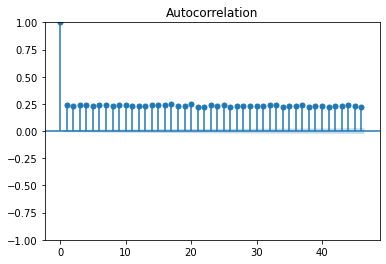

In [50]:
# plot autocorrelation
sm.graphics.tsa.plot_acf(est.resid)
plt.show()

## Checking For Normally Distributed Residuals

This one is easy to check for; we will do it visually. **This will require using a QQ pplot which help us assess if a set of data plausibly came from some theoretical distribution such as a Normal or exponential.** It’s just a visual check, not an air-tight proof, so it is somewhat subjective.

Visually what we are looking for is the data hugs the line tightly; this would give us confidence in our assumption that the residuals are normally distributed. Now, it is highly unlikely that the data will perfectly hug the line, so this is where we have to be subjective.

## Checking the Mean of the Residuals Equals 0

Additionally, we need to check another assumption, that the mean of the residuals is equal to zero. If the mean is very close to zero, then we are good to proceed. Just a side note, it's not uncommon to get a mean that isn't exactly zero; this is because of rounding errors. However, if it's very close to zero, it's ok. In the example below, you will see that it doesn't come out exactly to zero.

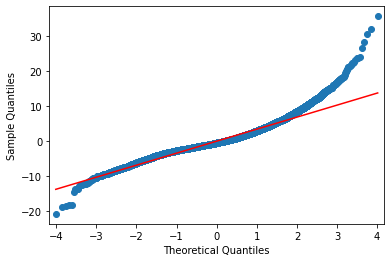

The mean of the residuals is 1.813e-14


In [51]:
import pylab

# check for the normality of the residuals
sm.qqplot(est.resid, line='s')
pylab.show()

# also check that the mean of the residuals is approx. 0.
mean_residuals = sum(est.resid)/ len(est.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))

### Measures of Error

We can examine how well our data fit the model, so we will take `y_predictions` and compare them to our `y_actuals` these will be our residuals. From here we can calculate a few metrics to help quantify how well our model fits the data. Here are a few popular metrics:

- **Mean Absolute Error (MAE):** Is the mean of the absolute value of the errors. This gives an idea of magnitude but no sense of direction (too high or too low).

- **Mean Squared Error (MSE):** Is the mean of the squared errors. MSE is more popular than MAE because MSE "punishes" more significant errors.

- **Root Mean Squared Error (RMSE):** Is the square root of the mean of the squared errors. RMSE is even more favored because it allows us to interpret the output in y-units.

- **Ordinary Least Squares (OLS):** OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output ($\hat{y}$) over all samples in the dataset.
<br>
OLS can find the best parameters using of the following methods:
    - Solving the model parameters analytically using closed-form equations
    - Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)

Luckily for us, `sklearn` and `statsmodel` both contain functions that will calculate these metrics for us. The examples below were calculated using the `sklearn` library and the `math` library.

In [54]:
import math
# calculate the mean squared error
model_mse = mean_squared_error(y_test, y_pred)

# calculate the mean absolute error
model_mae = mean_absolute_error(y_test, y_pred)

# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 12.4
MAE 2.53
RMSE 3.51


In [ ]:
# let's try and get the OLS here

***
### R-Squared
The R-Squared metric provides us a way to measure the goodness of fit or, in other words, how well our data fits the model. The higher the R-Squared metric, the better the data fit our model. However, one limitation is that R-Square increases as the number of features increase in our model, so if I keep adding variables even if they're poor choices R-Squared will still go up! **A more popular metric is the adjusted R-Square which penalizes more complex models, or in other words models with more exploratory variables.** In the example below, I calculate the regular R-Squared value, however, the `statsmodel` summary will calculate the Adjusted R-Squared below.

In [55]:
model_r2 = r2_score(y_test, y_pred)
print("R2: {:.2}".format(model_r2))

R2: 0.8


***
### Confidence Intervals
Let's look at our confidence intervals. Keep in mind that by default confidence intervals are calculated using 95% intervals. We interpret confidence intervals by saying if the population from which this sample was drawn was sampled 100 times. **Approximately 95 of those confidence intervals would contain the "true" coefficient.**

Why do we provide a confidence range? Well, it comes from the fact that we only have a sample of the population, not the entire population itself. Because of this, it means that the "true" coefficient could exist in the interval below or it couldn't, but we cannot say for sure. We provide some uncertainty by providing a range, usually 95%, where the coefficient is probably in.

- Want a narrower range? **Decrease your confidence**.
- Want a wider range? **Increase your confidence**.

In [56]:
# make some confidence intervals, 95% by default
est.conf_int()

,0,1
const,3.720346,4.483767
distance_long,0.002083,0.002154
angle_sum,0.002345,0.002721
QDepArr,0.969239,0.990084
AvgSpdLast5Arr,0.003876,0.005474
AvgSpdLast5,-0.008831,-0.007706
AvgSpdLast10Dep,-0.006706,-0.005501


### Hypothesis Testing

With hypothesis testing, we are trying to determine the statistical significance of the coefficient estimates. This test is outlined as the following.

- **Null Hypothesis:** There is no relationship between the exploratory variables and the explanatory variable.
- **Alternative Hypothesis:** There is a relationship between the exploratory variables and the explanatory variable.
***
- If we **reject the null**, we are saying there is a relationship, and the coefficients do not equal 0.
- If we **fail to reject the null**, we are saying there is no relationship, and the coefficients do equal 0

In [57]:
# estimate the p-values
est.pvalues

const               7.552922e-98
distance_long       0.000000e+00
angle_sum          5.578826e-152
QDepArr             0.000000e+00
AvgSpdLast5Arr      2.231282e-30
AvgSpdLast5        1.958496e-180
AvgSpdLast10Dep     2.805928e-87
dtype: float64

Here it's a little hard to tell, but we have a few insignificant coefficients. The first is the constant itself, so technically this should be dropped. However, we will see that once we remove the irrelevant variables that the intercept becomes significant. **If it still wasn't significant, we could have our intercept start at 0 and assume that the cumulative effect of X on Y begins from the origin (0,0).**

***
### Create a Summary of the Model Output
Let's create a summary of some of our keep metrics, `sklearn` does not have a good way of creating this output so we would have to calculate all the parameters ourselves. Let's avoid this and use the `statsmodel.api` library as we can create the same model we did up above, but we can also leverage the `summary()` method to create an output for us. Some of the metrics might differ slightly, but they generally should be the same.

In [58]:
# print out a summary
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:               TaxiTime   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                 2.275e+04
Date:                Wed, 30 Mar 2022   Prob (F-statistic):               0.00
Time:                        16:07:33   Log-Likelihood:                -87690.
No. Observations:               33095   AIC:                         1.754e+05
Df Residuals:                   33088   BIC:                         1.755e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               4.1021      0.195     

The first thing we notice is that the p-values from up above are now easier to read and we can now determine that the coefficients that have a p-value greater than 0.05 can be removed. We also have our 95% confidence interval (described up above), our coefficient estimates (described up above), the standard errors, and t-values.

The other metric that stands out is our Adjusted R-Squared value which is .878, lower than our R-Squared value. This makes sense as we were probably docked for the complexity of our model. However, an R-Squared over .878 is still very strong.

The only additional metrics we will describe here is the t-value which is the coefficient divided by the standard error. The higher the t-value, the more evidence we have to reject the null hypothesis. Also the standard error, the standard error is the approximate standard deviation of a statistical sample population.

# Section 6.5: OneHotEncoding

In [52]:
# One-hot encoding multiple columns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
import pandas as pd

df = HK_data
df = df.dropna()

transformer = make_column_transformer(
    (OneHotEncoder(sparse=False), ['airline', 'aircraftModel', 'flightNumber']),
    remainder='passthrough')

transformed = transformer.fit_transform(df)
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())

with pd.option_context("display.max_columns", 1000):
    print(transformed_df.head())
print(transformed_df.shape)

   onehotencoder__airline_AAL  onehotencoder__airline_AAR  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   
4                         0.0                         0.0   

   onehotencoder__airline_ABL  onehotencoder__airline_ABW  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   
4                         0.0                         0.0   

   onehotencoder__airline_ACA  onehotencoder__airline_AFL  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                     

In [40]:
# One-hot encoding multiple columns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
import pandas as pd

df = HK_data
df = df.dropna()
df = df.drop(['flightNumber'], axis=1)

transformer = make_column_transformer(
    (OneHotEncoder(sparse=False), ['airline', 'aircraftModel']),
    remainder='passthrough')

transformed = transformer.fit_transform(df)
transformed_df = pd.DataFrame(
    transformed, 
    columns=transformer.get_feature_names_out()
)

with pd.option_context("display.max_columns", 1000):
    print(transformed_df.head())
print(transformed_df.shape)

   onehotencoder__airline_AAL  onehotencoder__airline_AAR  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   
4                         0.0                         0.0   

   onehotencoder__airline_ABL  onehotencoder__airline_ABW  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   
4                         0.0                         0.0   

   onehotencoder__airline_ACA  onehotencoder__airline_AFL  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                     

In [53]:
# define our input variable (X) & output variable

transformed_df = transformed_df.astype(float)

X = transformed_df.drop('remainder__TaxiTime', axis = 1)
Y = transformed_df[['remainder__TaxiTime']]

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

# create a Linear Regression model object
regression_model = LinearRegression()

# pass through the X_train & y_train data set
regression_model.fit(X_train, y_train)

# The coefficients
print ('Coefficients: ', regression_model.coef_)

Coefficients:  [[-0.52444261  0.62813278  1.04823051 ... -0.00180969 -0.00214765
  -0.00105519]]


In [54]:
# let's grab the coefficient of our model and the intercept
intercept = regression_model.intercept_[0]
coefficent = regression_model.coef_[0][0]

print("The intercept for our model is {:.4}".format(intercept))
print('-'*100)

# loop through the dictionary and print the data
for coef in zip(X.columns, regression_model.coef_[0]):
    print("The Coefficient for {} is {:.2}".format(coef[0],coef[1]))

The intercept for our model is -17.85
----------------------------------------------------------------------------------------------------
The Coefficient for onehotencoder__airline_AAL is -0.52
The Coefficient for onehotencoder__airline_AAR is 0.63
The Coefficient for onehotencoder__airline_ABL is 1.0
The Coefficient for onehotencoder__airline_ABW is 2.1
The Coefficient for onehotencoder__airline_ACA is -0.35
The Coefficient for onehotencoder__airline_AFL is -0.65
The Coefficient for onehotencoder__airline_AFR is 1.2
The Coefficient for onehotencoder__airline_AHK is 3.5
The Coefficient for onehotencoder__airline_AIC is -0.78
The Coefficient for onehotencoder__airline_AIQ is -0.43
The Coefficient for onehotencoder__airline_ALK is -0.86
The Coefficient for onehotencoder__airline_ANA is -0.6
The Coefficient for onehotencoder__airline_ANG is 0.18
The Coefficient for onehotencoder__airline_ANZ is -0.068
The Coefficient for onehotencoder__airline_APJ is -0.4
The Coefficient for onehotencode

In [55]:
# Get multiple predictions
y_pred = regression_model.predict(X_test)

# Show the first 5 predictions
y_pred[:5]

array([[ 2.81336712],
       [ 9.40237646],
       [ 6.47912111],
       [13.62072413],
       [ 5.36892879]])

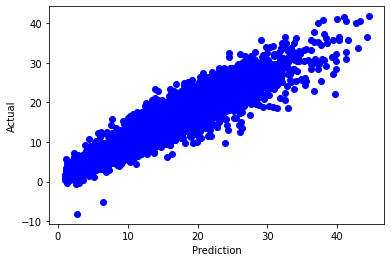

In [56]:
plt.scatter(y_test, y_pred,  color='blue')
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [57]:
import math
# calculate the mean squared error
model_mse = mean_squared_error(y_test, y_pred)

# calculate the mean absolute error
model_mae = mean_absolute_error(y_test, y_pred)

# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 4.64
MAE 1.5
RMSE 2.15


In [58]:
model_r2 = r2_score(y_test, y_pred)
print("R2: {:.2}".format(model_r2))

R2: 0.92


***
## Section Seven: Remove the Insignificant Variables.
Now that we know which variables are insignificant we should remove them from the model and refit the data to see what we get, the steps are the same the only thing I'm changing is that I am removing some additional columns from the data frame.

In [249]:
# define our input variable (X) & output variable
HK_data_after2 = HK_data_after.drop(['AvgSpdLast5Arr', 'AvgSpdLast5', 'AvgSpdLast10Dep', 'angle_sum'], axis = 1)

X = HK_data_after2.drop('TaxiTime', axis = 1)
Y = HK_data_after2[['TaxiTime']]

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

# create a Linear Regression model object
regression_model = LinearRegression()

# pass through the X_train & y_train data set
regression_model.fit(X_train, y_train)

LinearRegression()

In [250]:
# let's grab the coefficient of our model and the intercept
intercept = regression_model.intercept_[0]
coefficent = regression_model.coef_[0][0]

print("The intercept for our model is {:.4}".format(intercept))
print('-'*100)

# loop through the dictionary and print the data
for coef in zip(X.columns, regression_model.coef_[0]):
    print("The Coefficient for {} is {:.2}".format(coef[0],coef[1]))

The intercept for our model is 2.781
----------------------------------------------------------------------------------------------------
The Coefficient for distance_long is 0.0021
The Coefficient for QDepArr is 1.0


In [251]:
# Get multiple predictions
y_predict = regression_model.predict(X_test)

# Show the first 5 predictions
y_predict[:5]

array([[16.1518413 ],
       [10.52922618],
       [19.16409333],
       [20.69414936],
       [16.59906469]])

In [252]:
# define our intput
X2 = sm.add_constant(X)

# create a OLS model
model = sm.OLS(Y, X2)

# fit the data
est = model.fit()

In [253]:
# Run the Breusch-Pagan test
_, pval, __, f_pval = diag.het_breuschpagan(est.resid, est.model.exog)
print(pval, f_pval)
print('-'*100)

# print the results of the test
if pval > 0.05:
    print("For the Breusch-Pagan's Test")
    print("The p-value was {:.4}".format(pval))
    print("We fail to reject the null hypthoesis, so there is no heterosecdasticity.")

else:
    print("For the Breusch-Pagan's Test")
    print("The p-value was {:.4}".format(pval))
    print("We reject the null hypthoesis, so there is heterosecdasticity.")



0.0 0.0
----------------------------------------------------------------------------------------------------
For the Breusch-Pagan's Test
The p-value was 0.0
We reject the null hypthoesis, so there is heterosecdasticity.


In [254]:
# test for autocorrelation
from statsmodels.stats.stattools import durbin_watson

# calculate the lag, optional
lag = min(10, (len(X)//5))
print('The number of lags will be {}'.format(lag))
print('-'*100)

# run the Ljung-Box test for no autocorrelation of residuals
# test_results = diag.acorr_breusch_godfrey(est, nlags = lag, store = True)
test_results = diag.acorr_ljungbox(est.resid, lags = lag)

# grab the p-values and the test statistics
ibvalue, p_val = test_results

test_results

The number of lags will be 10
----------------------------------------------------------------------------------------------------


,lb_stat,lb_pvalue
1,2482.429784,0.0
2,4798.051329,0.0
3,7184.156439,0.0
4,9586.009519,0.0
5,11757.462650,0.0
6,14032.690865,0.0
7,16319.522475,0.0
8,18560.681068,0.0
9,20915.087736,0.0
10,23280.087692,0.0


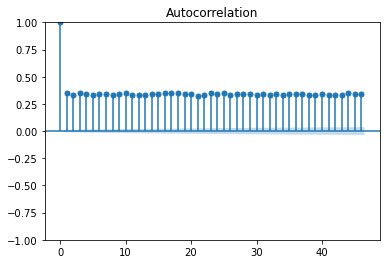

In [240]:
# plot autocorrelation
sm.graphics.tsa.plot_acf(est.resid)
plt.show()

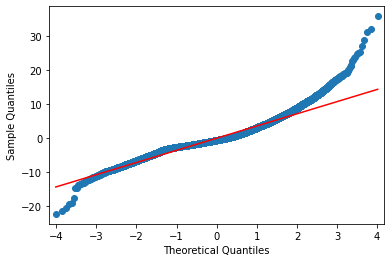

The mean of the residuals is 1.505e-14


In [255]:
import pylab

# check for the normality of the residuals
sm.qqplot(est.resid, line='s')
pylab.show()

# also check that the mean of the residuals is approx. 0.
mean_residuals = sum(est.resid)/ len(est.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))

In [256]:
import math
# calculate the mean squared error
model_mse = mean_squared_error(y_test, y_predict)

# calculate the mean absolute error
model_mae = mean_absolute_error(y_test, y_predict)

# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 13.3
MAE 2.62
RMSE 3.65


In [257]:
model_r2 = r2_score(y_test, y_predict)
print("R2: {:.2}".format(model_r2))

R2: 0.78


In [244]:
# make some confidence intervals, 95% by default
est.conf_int()

,0,1
const,6.282001,6.399939
QDepArr,1.407201,1.427779


In [245]:
# estimate the p-values
est.pvalues

const      0.0
QDepArr    0.0
dtype: float64

In [246]:
# print out a summary
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:               TaxiTime   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                 7.291e+04
Date:                Fri, 18 Mar 2022   Prob (F-statistic):               0.00
Time:                        17:14:28   Log-Likelihood:                -95465.
No. Observations:               33095   AIC:                         1.909e+05
Df Residuals:                   33093   BIC:                         1.910e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3410      0.030    210.765      0.0

***
## Section Eight: Save the Model for Future Use
We will probably want to use this model in the future, so let us save our work so we can use it later. Saving the model can be achieved by storing our model in a pickle which is storing a python object as a character stream in a file which can be reloaded later to use.

In [46]:
import pickle

# pickle the model
with open('my_mulitlinear_regression.sav','wb') as f:
     pickle.dump(regression_model, f)

# load it back in
with open('my_mulitlinear_regression.sav', 'rb') as pickle_file:
     regression_model_2 = pickle.load(pickle_file)

# make a new prediction
regression_model_2.predict([X_test.loc[2002]])

array([[7.6042968]])